<a href="https://colab.research.google.com/github/angelaglo/clustering-k-means/blob/main/Clustering_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Countries using K-Means**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/angelaglo/clustering-k-means/main/Data_Negara_HELP.csv'
df = pd.read_csv(url, encoding= 'unicode_escape')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.drop(columns=['Ekspor',
                  'Impor',
                  'Inflasi',
                  'Harapan_hidup',
                  'Jumlah_fertiliti'], inplace=True)
df

,Negara,Kematian_anak,Kesehatan,Pendapatan,GDPperkapita
0,Afghanistan,90.2,7.58,1610,553
1,Albania,16.6,6.55,9930,4090
2,Algeria,27.3,4.17,12900,4460
3,Angola,119.0,2.85,5900,3530
4,Antigua and Barbuda,10.3,6.03,19100,12200
...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,2970
163,Venezuela,17.1,4.91,16500,13500
164,Vietnam,23.3,6.84,4490,1310
165,Yemen,56.3,5.18,4480,1310


In [ ]:
df.shape

(167, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Negara         167 non-null    object 
 1   Kematian_anak  167 non-null    float64
 2   Kesehatan      167 non-null    float64
 3   Pendapatan     167 non-null    int64  
 4   GDPperkapita   167 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 6.6+ KB


In [ ]:
df.describe()
#N = 167 negara

,Kematian_anak,Kesehatan,Pendapatan,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6.815689,17144.688623,12964.155689
std,40.328931,2.746837,19278.067698,18328.704809
min,2.600000,1.810000,609.000000,231.000000
25%,8.250000,4.920000,3355.000000,1330.000000
50%,19.300000,6.320000,9960.000000,4660.000000
75%,62.100000,8.600000,22800.000000,14050.000000
max,208.000000,17.900000,125000.000000,105000.000000


In [ ]:
kematian = df.sort_values('Kematian_anak', ascending=False)
kematian

,Negara,Kematian_anak,Kesehatan,Pendapatan,GDPperkapita
66,Haiti,208.0,6.91,1500,662
132,Sierra Leone,160.0,13.10,1220,399
32,Chad,150.0,4.53,1930,897
31,Central African Republic,149.0,3.98,888,446
97,Mali,137.0,4.98,1870,708
...,...,...,...,...,...
53,Finland,3.0,8.95,39800,46200
144,Sweden,3.0,9.63,42900,52100
133,Singapore,2.8,3.96,72100,46600
91,Luxembourg,2.8,7.77,91700,105000


In [ ]:
pendapatan = df.sort_values('GDPperkapita', ascending=True)
pendapatan

,Negara,Kematian_anak,Kesehatan,Pendapatan,GDPperkapita
26,Burundi,93.6,11.60,764,231
88,Liberia,89.3,11.80,700,327
37,"Congo, Dem. Rep.",116.0,7.91,609,334
112,Niger,123.0,5.16,814,348
132,Sierra Leone,160.0,13.10,1220,399
...,...,...,...,...,...
44,Denmark,4.1,11.40,44000,58000
123,Qatar,9.0,1.81,125000,70300
145,Switzerland,4.5,11.50,55500,74600
114,Norway,3.2,9.48,62300,87800




---
**Univariate Analysis**
---






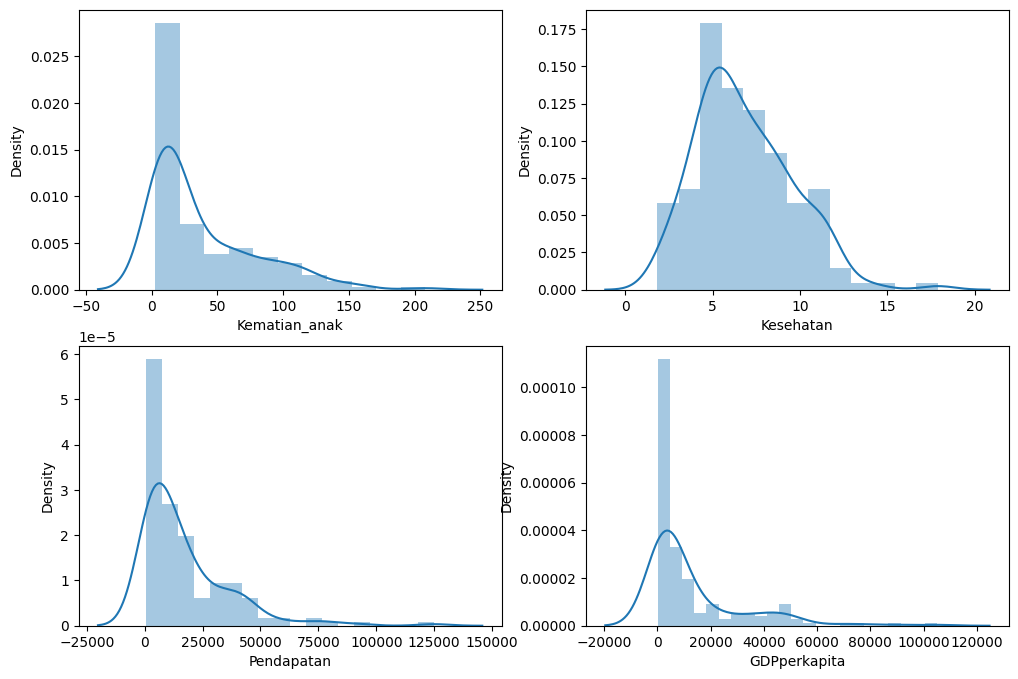

In [ ]:
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(2,2, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

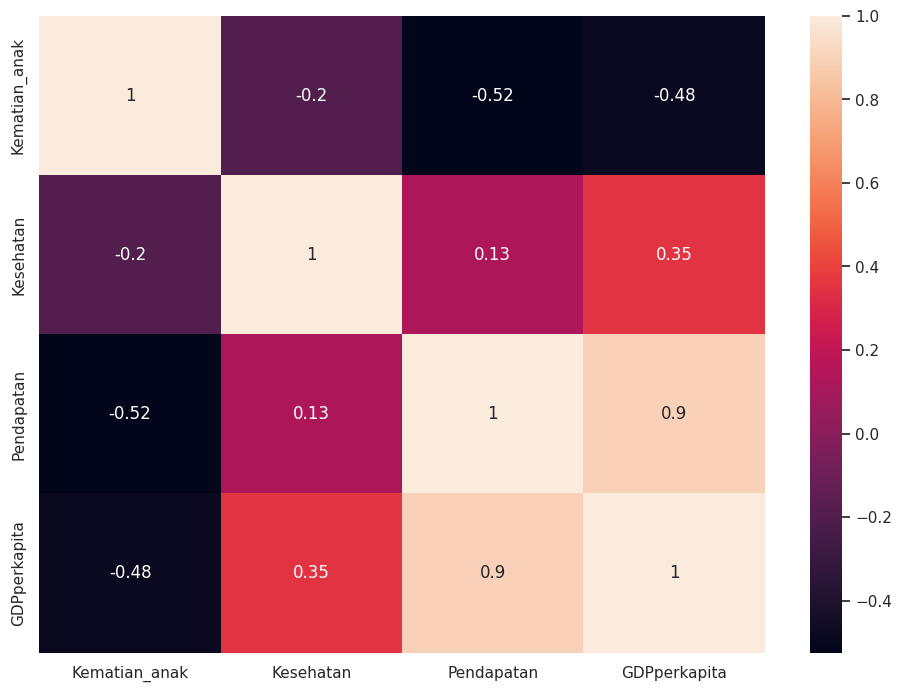

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2g');

In [ ]:
dfBoxPlotKesehatan = df.copy()
dfBoxPlotKesehatan.drop(columns=['Pendapatan','GDPperkapita'], inplace=True)
dfBoxPlotEkonomi = df.copy()
dfBoxPlotEkonomi.drop(columns=['Kematian_anak','Kesehatan'], inplace=True)


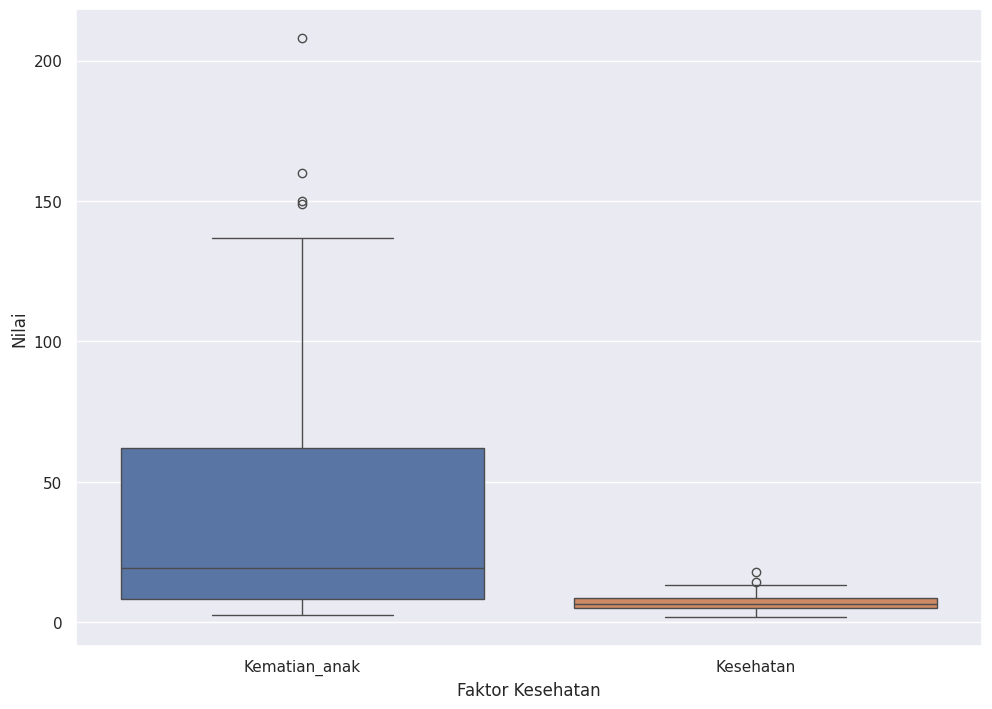

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=dfBoxPlotKesehatan)
ax.set(xlabel='Faktor Kesehatan', ylabel='Nilai');

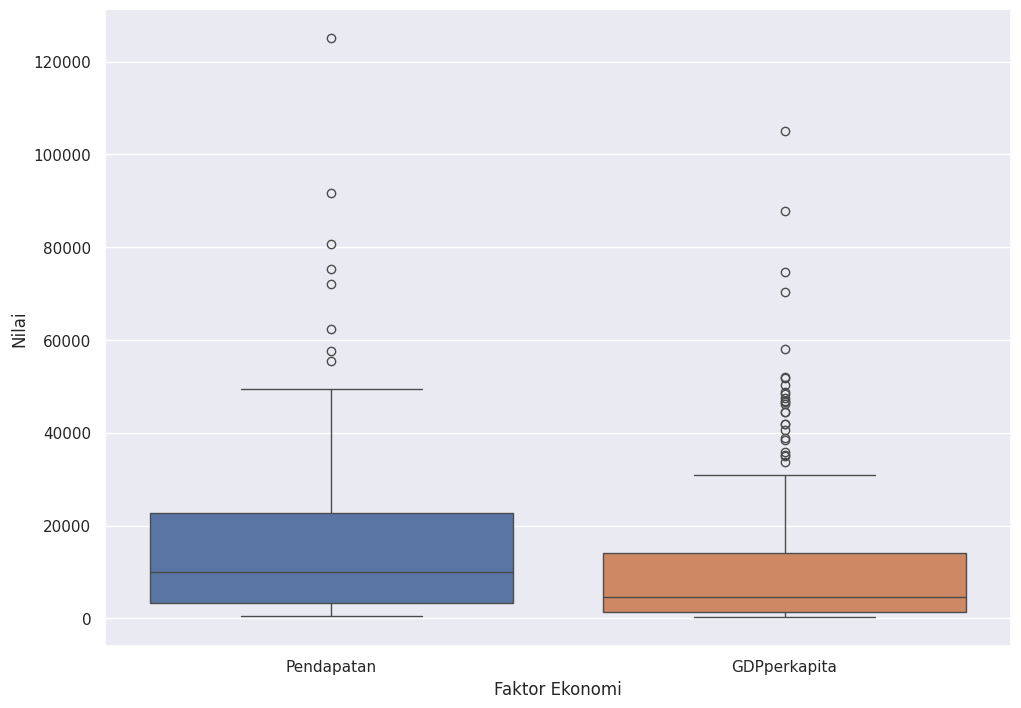

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax1 = sns.boxplot(data=dfBoxPlotEkonomi)
ax1.set(xlabel='Faktor Ekonomi', ylabel='Nilai');

1.450773538755505


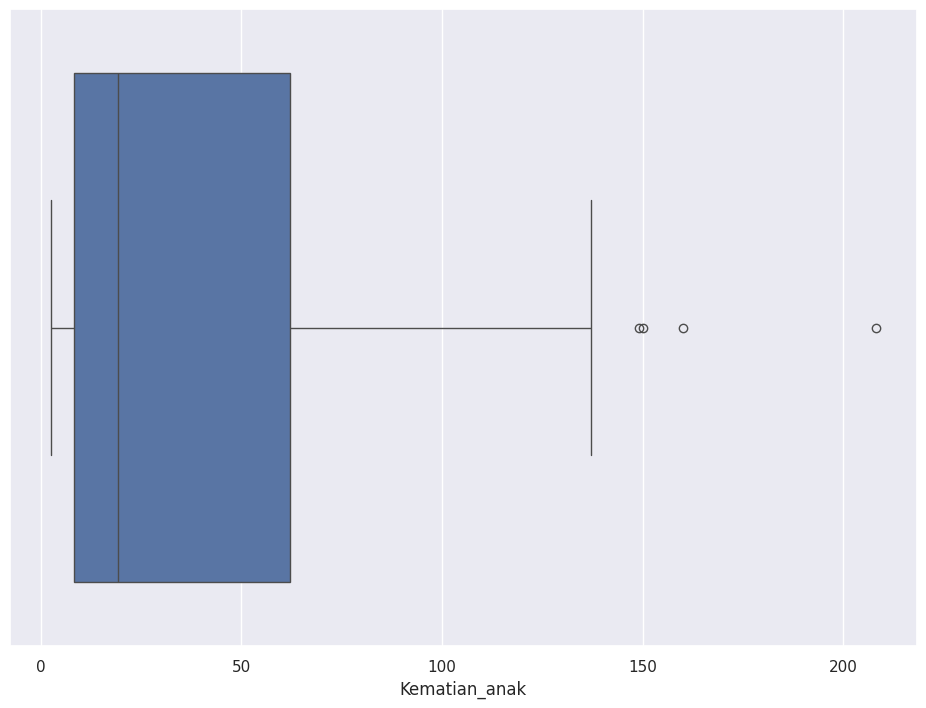

In [ ]:
sns.boxplot(x='Kematian_anak', data=df)
print(scipy.stats.skew(df['Kematian_anak'], bias = False))

0.7057460547100979


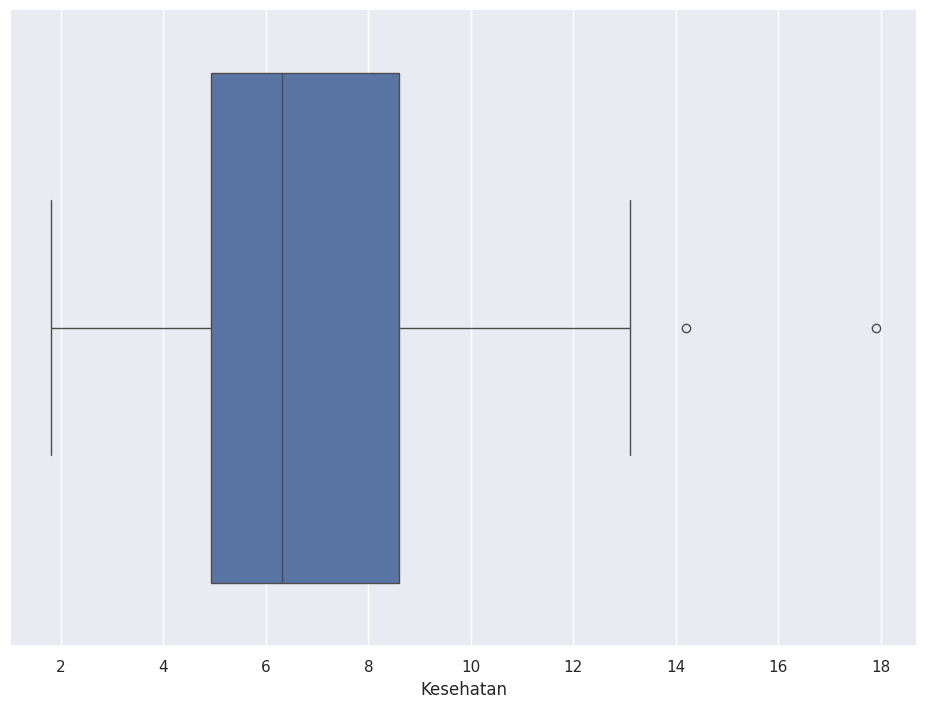

In [ ]:
sns.boxplot(x='Kesehatan', data=df)
print(scipy.stats.skew(df['Kesehatan'], bias = False))

2.2314796077675267


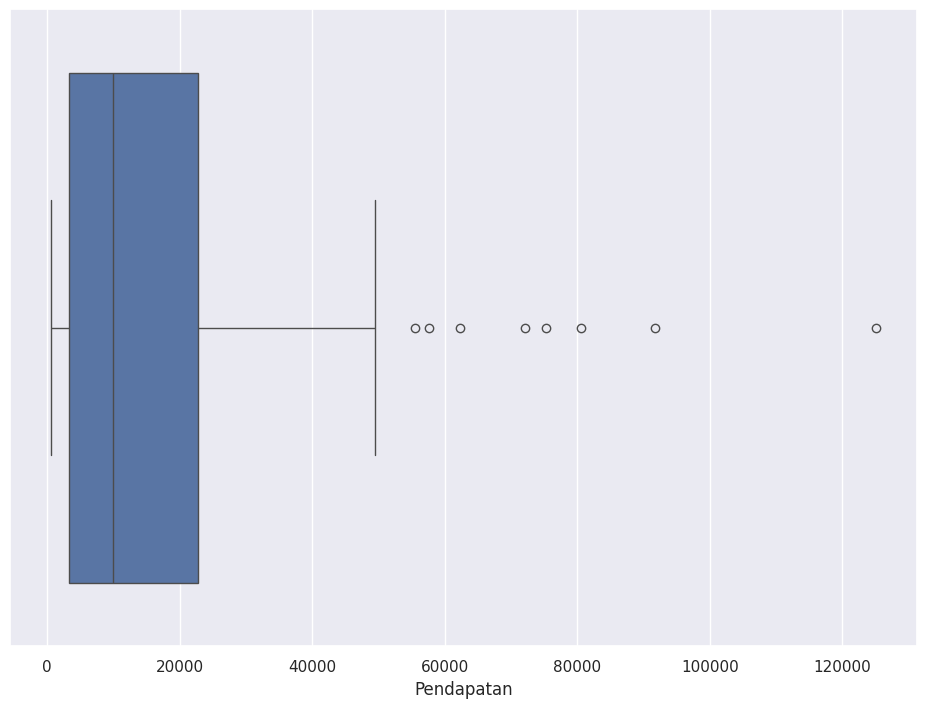

In [ ]:
sns.boxplot(x='Pendapatan', data=df)
print(scipy.stats.skew(df['Pendapatan'], bias = False))

2.218051451949716


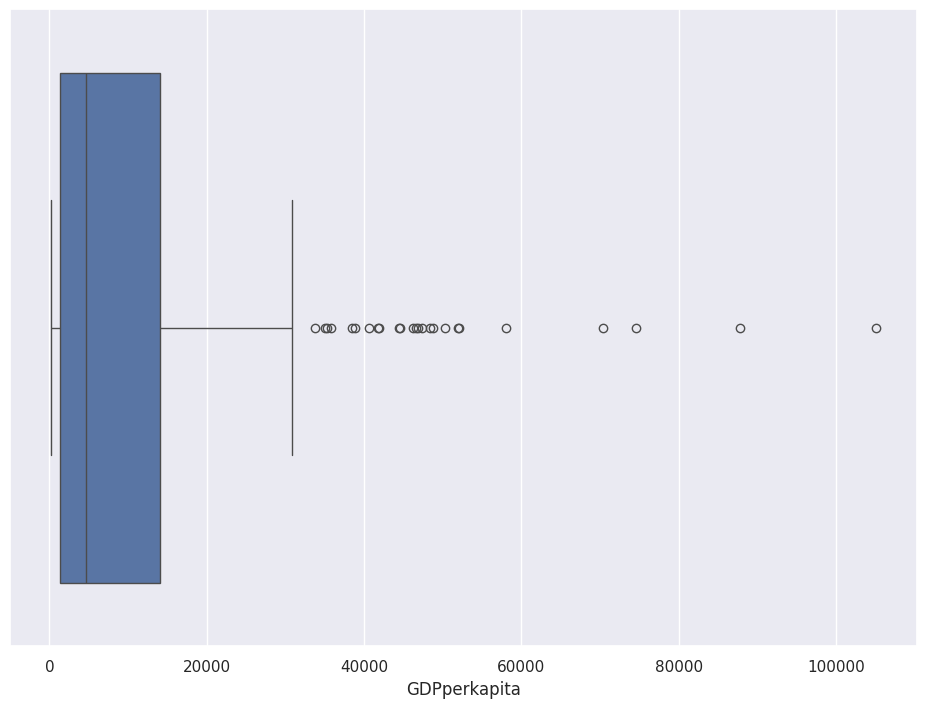

In [ ]:
sns.boxplot(x='GDPperkapita', data=df)
print(scipy.stats.skew(df['GDPperkapita'], bias = False))

In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

df2 = remove_outlier(df[['Kematian_anak', 'Kesehatan']])
df2.fillna(method='ffill', inplace=True)
df2

,Kematian_anak,Kesehatan
0,90.2,7.58
1,16.6,6.55
2,27.3,4.17
3,119.0,2.85
4,10.3,6.03
...,...,...
162,29.2,5.25
163,17.1,4.91
164,23.3,6.84
165,56.3,5.18


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)

Elbow Graph


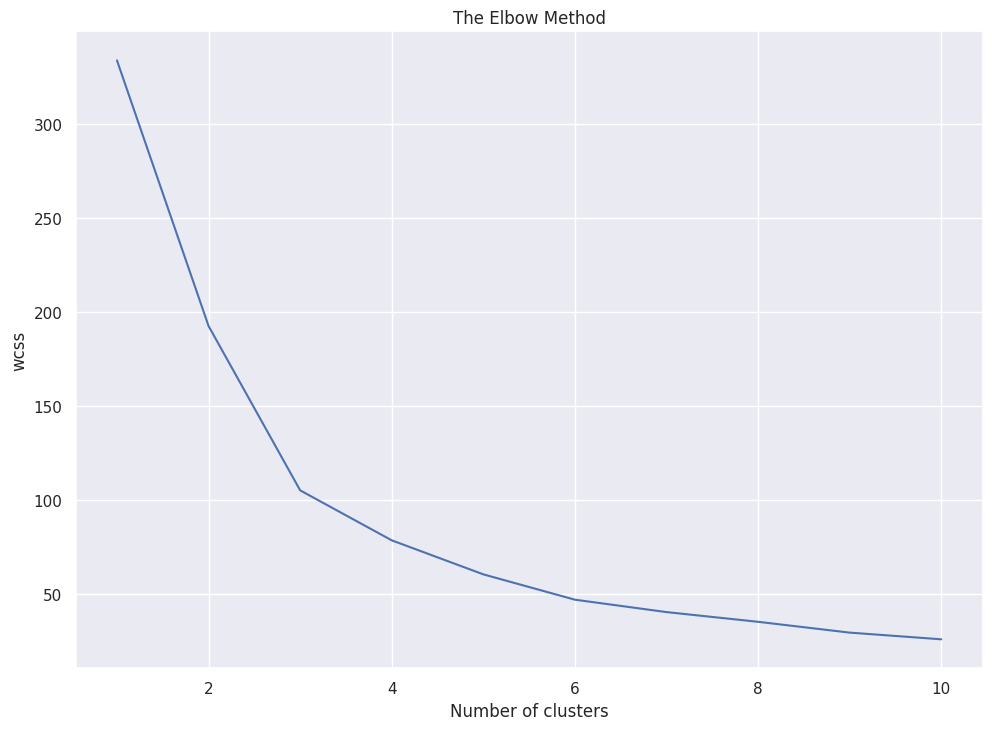

In [ ]:
from sklearn.cluster import KMeans
print('Elbow Graph')
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
new_df = pd.DataFrame(data=df_std, columns=['Kematian_anak', 'Kesehatan'])
new_df['label_kmeans'] = labels2
new_df

,Kematian_anak,Kesehatan,label_kmeans
0,1.595554,0.338975,2
1,-0.528188,-0.065654,1
2,-0.219438,-1.000624,1
3,2.426584,-1.519179,2
4,-0.709976,-0.269934,1
...,...,...,...
162,-0.164613,-0.576352,1
163,-0.513761,-0.709919,1
164,-0.334859,0.048270,1
165,0.617363,-0.603851,1


n_cluster = 3


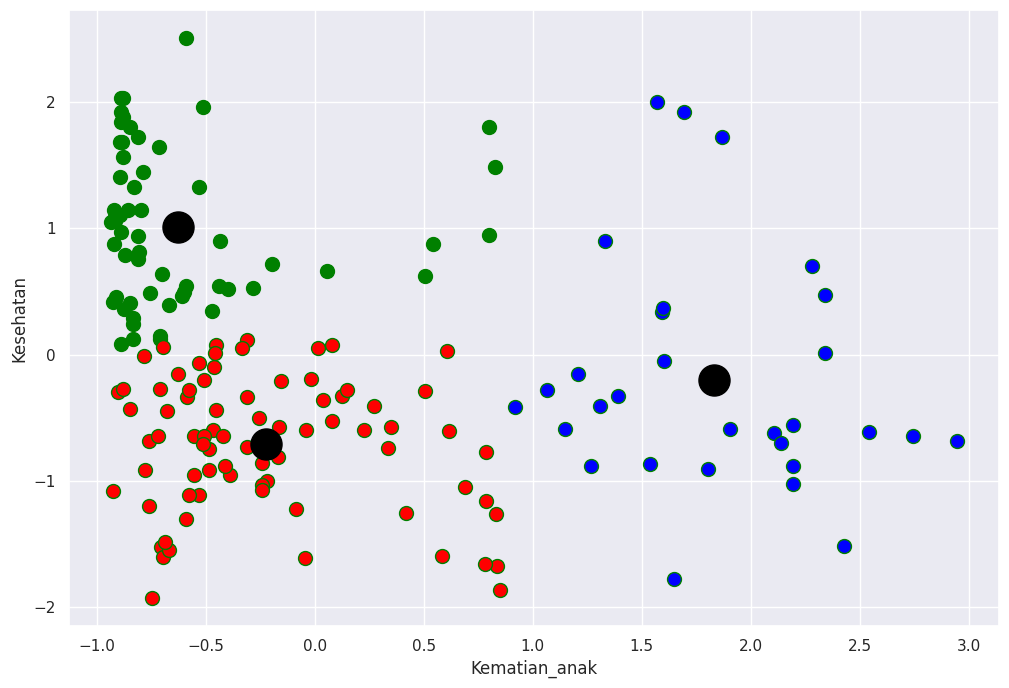

In [ ]:
plt.figure(figsize=(12,8))

print('n_cluster = 3')
plt.scatter(new_df['Kematian_anak'][new_df.label_kmeans == 0], new_df['Kesehatan'][new_df.label_kmeans == 0], c='green', s=100, edgecolor='green')
plt.scatter(new_df['Kematian_anak'][new_df.label_kmeans == 1], new_df['Kesehatan'][new_df.label_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df['Kematian_anak'][new_df.label_kmeans == 2], new_df['Kesehatan'][new_df.label_kmeans == 2], c='blue', s=100, edgecolor='green')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='black', s=500 )
plt.xlabel('Kematian_anak')
plt.ylabel('Kesehatan')
plt.show()

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['negara'] = kematian.Negara
cluster_map['cluster'] = kmeans2.labels_
cluster_map

,negara,cluster
66,Haiti,2
132,Sierra Leone,1
32,Chad,1
31,Central African Republic,2
97,Mali,1
...,...,...
53,Finland,1
144,Sweden,1
133,Singapore,1
91,Luxembourg,1


In [ ]:
cluster_map[cluster_map.cluster == 0]

,negara,cluster
113,Nigeria,0
3,Angola,0
25,Burkina Faso,0
64,Guinea-Bissau,0
49,Equatorial Guinea,0
28,Cameroon,0
116,Pakistan,0
94,Malawi,0
150,Togo,0
84,Lao,0


Elbow Graph


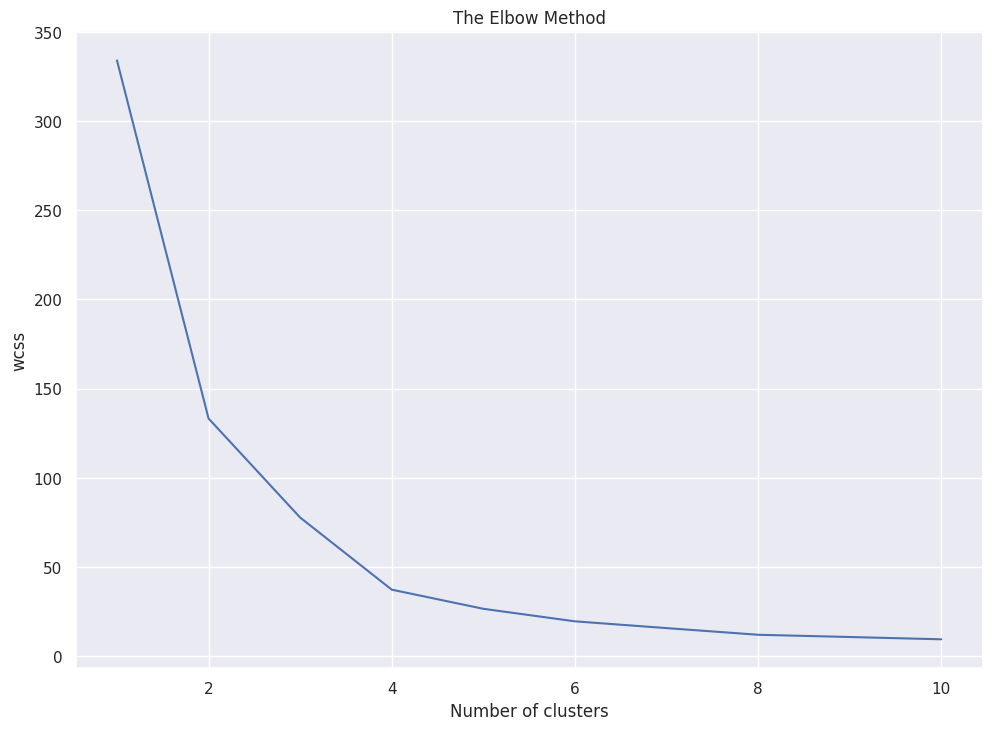

In [ ]:
#ekonomi
df3 = remove_outlier(df[['Pendapatan', 'GDPperkapita']])
df3.fillna(method='ffill', inplace=True)
sc1 = StandardScaler()
df_std1 = sc1.fit_transform(df3)
print('Elbow Graph')
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:

kmeans3 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std1)
labels3 = kmeans3.labels_
new_df1 = pd.DataFrame(data=df_std1, columns=['Pendapatan', 'GDPperkapita'])
new_df1['label_kmeans2'] = labels3
new_df1

,Pendapatan,GDPperkapita,label_kmeans2
0,-0.953057,-0.822826,2
1,-0.321249,-0.327586,2
2,-0.095711,-0.275780,2
3,-0.627281,-0.405996,2
4,0.375108,0.807949,0
...,...,...,...
162,-0.851300,-0.484405,2
163,0.177668,0.989971,0
164,-0.734354,-0.716833,2
165,-0.735114,-0.716833,2


n_cluster = 4


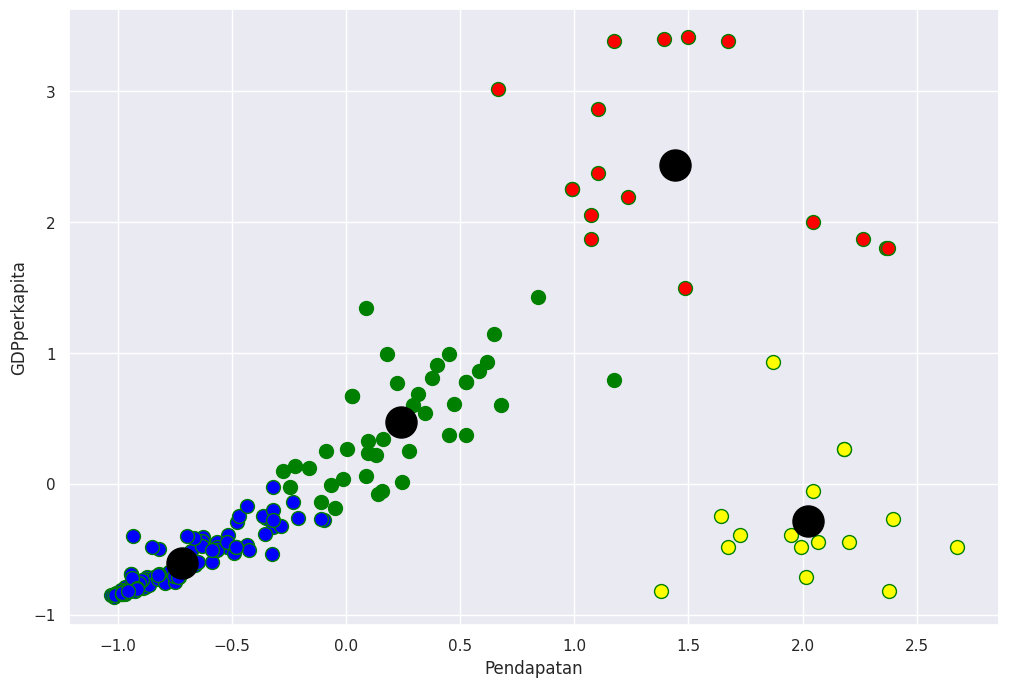

In [ ]:
plt.figure(figsize=(12,8))

print('n_cluster = 4')
plt.scatter(new_df1['Pendapatan'][new_df1.label_kmeans2 == 0], new_df1['GDPperkapita'][new_df1.label_kmeans2 == 0], c='green', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label_kmeans2 == 1], new_df1['GDPperkapita'][new_df1.label_kmeans2 == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label_kmeans2 == 2], new_df1['GDPperkapita'][new_df1.label_kmeans2 == 2], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label_kmeans2 == 3], new_df1['GDPperkapita'][new_df1.label_kmeans2 == 3], label='0',c='yellow', s=100, edgecolor='green')

plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='black', s=500 )
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

In [ ]:
cluster_map1 = pd.DataFrame()
cluster_map1['negara'] = pendapatan.Negara
cluster_map1['cluster'] = kmeans3.labels_
cluster_map1

,negara,cluster
26,Burundi,2
88,Liberia,2
37,"Congo, Dem. Rep.",2
112,Niger,2
132,Sierra Leone,0
...,...,...
44,Denmark,2
123,Qatar,0
145,Switzerland,2
114,Norway,2


In [ ]:
tabel_kesehatan = cluster_map[cluster_map.cluster == 0].head(20)
tabel_kemiskinan = cluster_map1[cluster_map1.cluster == 0].head(20)

tabelAll = pd.merge(tabel_kesehatan, tabel_kemiskinan, on='negara', how='inner')
tabelAll

,negara,cluster_x,cluster_y
0,Nigeria,0,0
1,Lao,0,0
2,Timor-Leste,0,0
3,Eritrea,0,0
